<a href="https://colab.research.google.com/github/vinigm/Portfolio/blob/main/3_SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Analysis**
---

Esse projeto consiste na análise de planilhas mensais de faturamento de uma loja. A modelagem se faz presente para uma melhor compreensão de direcionamento estratégico de custos.

Infelizmente as tabelas não possuem as marcas dos produtos, mas temos discriminados os nomes desses, bem como datas das ordens de compras e locais aos quais foram destinados.

>Através da análise, responderemos as seguintes perguntas:
>>1. Qual mês teve maior faturamento?
>>2. Qual cidade gerou maior faturamento?
3. A que horas devemos lançar uma campanha de marketing?
4. Qual o produto mais vendido?
5. Quais produtos são mais comprados em conjunto?

## **Importação de bibliotecas e dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

Os dados são referentes às vendas de produtos ao longo de um ano. Os datasets estão divididos por mês.

In [2]:
datajan = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_January_2019.csv') #January
datafeb = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_February_2019.csv') #February
datamarch = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_March_2019.csv') #March
dataabril = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv') #Abril
datamay = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_May_2019.csv') #May
datajun = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_June_2019.csv') #June
datajul = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_July_2019.csv') #July
dataaug = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_August_2019.csv') #August
datasep = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_September_2019.csv') #September
dataoc = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_October_2019.csv') #October
datanov = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_November_2019.csv') #November
datadez = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_December_2019.csv') #December

**Transformação em DataFrames** de todas as tabelas individuais.

In [3]:
dfjan = pd.DataFrame(datajan)
dffeb = pd.DataFrame(datafeb)
dfmarch = pd.DataFrame(datamarch)
dfabril = pd.DataFrame(dataabril)
dfmay = pd.DataFrame(datamay)
dfjun = pd.DataFrame(datajun)
dfjul = pd.DataFrame(datajul)
dfaug = pd.DataFrame(dataaug)
dfsep = pd.DataFrame(datasep)
dfoc = pd.DataFrame(dataoc)
dfnov = pd.DataFrame(datanov)
dfdez = pd.DataFrame(datadez)

In [4]:
len(dfabril)

18383

**Concatenação** das tabelas para melhor trabalhabilidade.

In [5]:
df = pd.concat([dfjan, dffeb, dfmarch, dfabril, dfmay, dfjun, dfjul, dfaug, dfsep, dfoc, dfnov, dfdez])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## **Exploração e Limpeza dos Dados**

**Renomeando** colunas para melhor trabalhabilidade.

In [6]:
df.columns = df.columns.str.replace(' ','_')

df.rename(columns={"Order_ID": "order_id",
                     "Product": "product",
                     "Quantity_Ordered": "quantity_ordered",
                     "Price_Each": "price_each",
                     "Order_Date": "order_date",
                     "Purchase_Address": "purchase_address"
                     }, inplace=True)

In [7]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [8]:
df.shape

(186850, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


**Verificação** de valores não nulos

In [10]:
df.isnull().sum()      # Necessário um tratamento nos dados com valores nulos.

order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

In [11]:
# Porcentagem de dados faltantes no DF (em %)

faltantes = (df.isnull().sum() / len(df['order_id']))*100
print(faltantes)

order_id            0.291678
product             0.291678
quantity_ordered    0.291678
price_each          0.291678
order_date          0.291678
purchase_address    0.291678
dtype: float64


In [12]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2 = df.dropna()

In [14]:
df2.shape

(186305, 6)

In [15]:
# Não foi possível transformar a coluna "month" para "integer" pois o erro acusava que existia algum dado com valor de "Or"
# Assim, apenas para fins de exploração se faz o DF temporário com uma coluna apenas com meses com valor igual à "Or".

temp_df = df2[df2['order_date'].str[0:2] == 'Or']
temp_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
len(temp_df)

355

Como temos 320 linhas apenas, isso representa algo em torno de 0.28% do nosso dataframe. Desprezivel em relação ao valor global, assim, retira-se essas linhas para dar sequencia na análise.

In [17]:
df2 = df2[df2['order_date'].str[0:2] != 'Or']

In [18]:
len(df2)

185950

- len(df) = 168.467
- len(df2) = 167.981 (Depois de retirar os valores nulos)
- len(df2) = 167.661 (Depois de retirar os valores nulos e "Or's"

## **Qual mês teve maior faturamento?**

**Criação** da coluna mês e conversão dos dados para "int32"

In [19]:
df2['month'] = df2['order_date'].str[0:2]
df2['month'] = df2['month'].astype('int32')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          185950 non-null  object
 1   product           185950 non-null  object
 2   quantity_ordered  185950 non-null  object
 3   price_each        185950 non-null  object
 4   order_date        185950 non-null  object
 5   purchase_address  185950 non-null  object
 6   month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [21]:
df2.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [22]:
# Copiando para um dataframe novo para não estragar os dados e ter um backup seguro
df3 = df2

In [23]:
# Convertendo as colunas "price_each" e "quantity_ordered" para numéricas e fazer sua multiplicação

df3['price_each'] = pd.to_numeric(df3['price_each'])
df3['quantity_ordered'] = pd.to_numeric(df3['quantity_ordered'])
df3['order_sale'] = df3['quantity_ordered']*df3['price_each']

In [24]:
df3.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,order_sale
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [25]:
monthly_sales = df3.groupby('month').sum()
print(monthly_sales)

       quantity_ordered  price_each  order_sale
month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


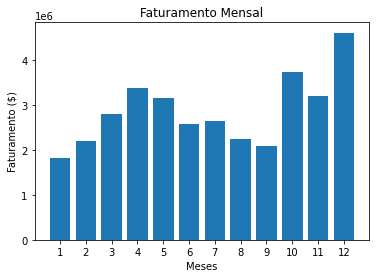

In [26]:
months = range(1,13)
plt.bar(months, monthly_sales['order_sale'])
plt.title('Faturamento Mensal')
plt.xticks(months)
plt.xlabel('Meses')
plt.ylabel('Faturamento ($)')
plt.show()

**RESPONDENDO ASSIM A PERGUNTA**

O mês que mais vendeu foi dezembro.

## **Qual cidade gerou maior faturamento?**

O primeiro passo é construir uma **coluna com as cidades**:

In [27]:
df3['cities'] = df3['purchase_address'].apply(lambda x: x.split(',')[1])
df3.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,order_sale,cities
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [28]:
df3['state'] = df3['purchase_address'].apply(lambda x: x.split(',')[2].split(' ')[1])
df3.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,order_sale,cities,state
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX


In [29]:
df3['city_state'] = df3['purchase_address'].apply(lambda x: x.split(',')[1]+ ' ' + x.split(',')[2].split(' ')[1])
df3.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,order_sale,cities,state,city_state
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,Austin TX


In [30]:
city_sales = df3.groupby('city_state').sum()
city_sales

,quantity_ordered,price_each,month,order_sale
city_state,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


**ENTENDER ISSO AQUI!!!**

Pq nesse grafico aqui SF nao é o maior? mas no proximo vai dar certo


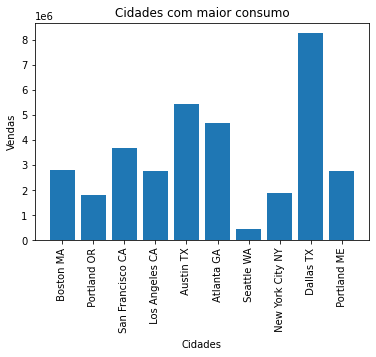

In [31]:
plt.bar(df3['city_state'].unique(), city_sales['order_sale'])
plt.title('Cidades com maior consumo')
plt.xticks(rotation = 90)
plt.xlabel('Cidades')
plt.ylabel('Vendas')
plt.show()

**AQUI FUNCIONA NORMAL**

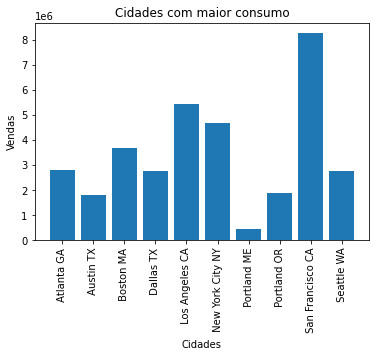

In [51]:
cities = [city for city, df in df3.groupby('city_state')]

plt.bar(cities, city_sales['order_sale'])
plt.title('Cidades com maior consumo')
plt.xticks(rotation = 90)
plt.xlabel('Cidades')
plt.ylabel('Vendas')
plt.show()

**RESPONDENDO A QUESTÃO**

A cidade que mais consumiu foi San Francisco - CA.

## **Que horas devemos fazer uma campanha de marketing?**

In [40]:
# Outro backup para fazer novas manipulações e ter a segurança de não estragar o que foi feito até agora

df4 = df3

In [42]:
#df3['time'] = df3['order_date'].str[-5:]

df4['order_date'] = pd.to_datetime(df4['order_date'])

In [44]:
df4['time'] = df4['order_date'].dt.hour
df4.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,order_sale,cities,state,city_state,time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,Boston MA,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,Portland OR,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,Los Angeles CA,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,Austin TX,11


In [47]:
hour_sales = df4.groupby('time').sum()
hour_sales

,quantity_ordered,price_each,month,order_sale
time,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


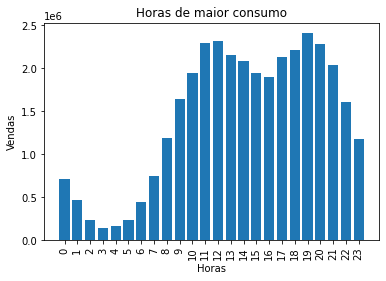

In [52]:
hours = [hour for hour, df4 in df4.groupby('time')]

plt.bar(hours, hour_sales['order_sale'])
plt.title('Horas de maior consumo')
plt.xticks(hours, rotation = 90)
plt.xlabel('Horas')
plt.ylabel('Vendas')
plt.show()

**RESPONDENDO A QUESTÃO**

Os horários que devem ser veículadas propagandas precisam ser 11h e 19h, visto que as compras acontecem entre 12h e 20h.

## **Quais itens mais vendidos?**

In [53]:
df4.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,order_sale,cities,state,city_state,time
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,MA,Boston MA,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,OR,Portland OR,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,CA,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,CA,Los Angeles CA,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,TX,Austin TX,11


In [62]:
produtos_unicos = df4['product'].unique().tolist()
produtos_unicos

['iPhone',
 'Lightning Charging Cable',
 'Wired Headphones',
 '27in FHD Monitor',
 'AAA Batteries (4-pack)',
 '27in 4K Gaming Monitor',
 'USB-C Charging Cable',
 'Bose SoundSport Headphones',
 'Apple Airpods Headphones',
 'Macbook Pro Laptop',
 'Flatscreen TV',
 'Vareebadd Phone',
 'AA Batteries (4-pack)',
 'Google Phone',
 '20in Monitor',
 '34in Ultrawide Monitor',
 'ThinkPad Laptop',
 'LG Dryer',
 'LG Washing Machine']

In [67]:
soma_produtos = df4.groupby('product').sum()
soma_produtos

,quantity_ordered,price_each,month,order_sale,time
product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


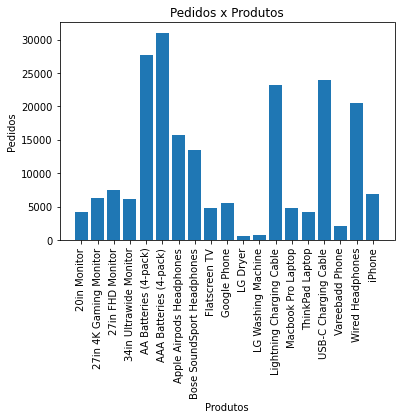

In [68]:
produtos = [prod for prod, df4 in df4.groupby('product')]

plt.bar(produtos, soma_produtos['quantity_ordered'])
plt.title('Pedidos x Produtos')
plt.xticks(produtos, rotation = 90)
plt.xlabel('Produtos')
plt.ylabel('Pedidos')
plt.show()

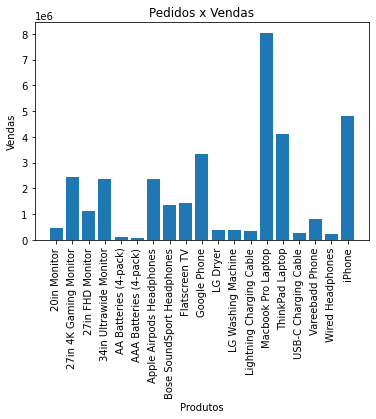

In [69]:
produtos = [prod for prod, df4 in df4.groupby('product')]

plt.bar(produtos, soma_produtos['order_sale'])
plt.title('Pedidos x Vendas')
plt.xticks(produtos, rotation = 90)
plt.xlabel('Produtos')
plt.ylabel('Vendas')
plt.show()

## **Quais produtos são mais vendidos em conjunto?**

In [81]:
#Outro DF para manipulações
df5 = df4

In [85]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

df6 = df5[df5['order_id'].duplicated(keep=False)]
df6.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,order_sale,cities,state,city_state,time
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,TX,Austin TX,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin,TX,Austin TX,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,CA,Los Angeles CA,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles,CA,Los Angeles CA,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,NY,New York City NY,11


In [86]:
# https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df6['grouped'] = df6.groupby('order_id')['product'].transform(lambda x: ','.join(x))
df6 = df6[['order_id', 'grouped']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
df6.head()

,order_id,grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [89]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df6['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# **Considerações Finais**

**1. Qual mês gerou mais faturamento?**

O mês de dezembro teve o maior faturamento, porém ja se pode observar um aumento até mesmo durante o mês outubro e novembro.


**2. Qual cidade gerou maior faturamento?**

São Francisco - CA


**3. Que horas devemos fazer uma campanha de marketing?**

12h e 20h são os horários de maiores ordens de compras geradas no site, então provavelmente o melhor horário para uma campanha é antes desse horário. Talvez as 11h e 19h.


**4. Quais os itens mais vendidos?**

Temos duas abordagens para essa questão:
1. O item que vendeu mais em números absolutos, os quais são as pilhas AAA
2. O item que gerou maior faturamento, que é o Mac Book Pro

**5. Quais itens são mais vendidos em conjunto?**

iPhone e o Lightning Cabble. Isso pode ser usado talvez para gerar uma campanha de marketing, aonde se você comprar um iPhone, ganha o cabo.